### 10 урок

#### AБ тесты: введение в проблематику

#### Кейс №1 - Приложение знакомств

Выполнила: студентка 53 потока DA - Сулейманова Гульнар.

### Задача – оценить, правда ли, что новый алгоритм улучшил качество сервиса. Для этого нужно выбрать метрики, которые отвечают за качество сервиса, и статистически сравнить эти метрики в двух группах.

### Импорт библиотек.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2, mannwhitneyu, shapiro, kruskal

In [3]:
# Выгружаем датафрейм с яндекс диска.
date_df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/txn7q-CE2zSaPg')

#### Исследуем датафрейм.

In [4]:
date_df.head()

,user_id_1,user_id_2,group,is_match
0,79,91,1,1
1,716,353,1,1
2,423,677,0,0
3,658,165,1,1
4,969,155,0,1


In [5]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14514 entries, 0 to 14513
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id_1  14514 non-null  int64
 1   user_id_2  14514 non-null  int64
 2   group      14514 non-null  int64
 3   is_match   14514 non-null  int64
dtypes: int64(4)
memory usage: 453.7 KB


In [6]:
date_df.shape

(14514, 4)

In [7]:
date_df.nunique()

user_id_1    1000
user_id_2    1000
group           2
is_match        2
dtype: int64

In [8]:
date_df.dtypes

user_id_1    int64
user_id_2    int64
group        int64
is_match     int64
dtype: object

***Метрикой*** для оценки качества приложения в данном случае будет - ***количество мэтчей***. 

#### Сделаем два отдельных датафрейма. (Основная группа - видит старый алгоритм, тестовая группа - новый алгоритм)

In [9]:
main_group = date_df.query('group == 0')
test_group = date_df.query('group == 1')

#### Посчиатем кол-во мэтчей для каждой группы.

In [10]:
match_main_group = test_group.groupby('is_match',as_index=False) \
                             .agg({'group':'count'}) \
                             .rename(columns={'group' : 'count_of_match'})
match_main_group

,is_match,count_of_match
0,0,5813
1,1,3909


In [11]:
match_test_group = main_group.groupby('is_match',as_index=False) \
                             .agg({'group':'count'}) \
                             .rename(columns={'group' : 'count_of_match'})
match_test_group

,is_match,count_of_match
0,0,3858
1,1,934


#### Теперь посмотрим на мэтчи внутри групп.

In [12]:
#В % соотношении для группы со старым алгоритмом.
round(main_group.is_match.value_counts(normalize=True),2)

0    0.81
1    0.19
Name: is_match, dtype: float64

<Axes: xlabel='is_match', ylabel='count'>

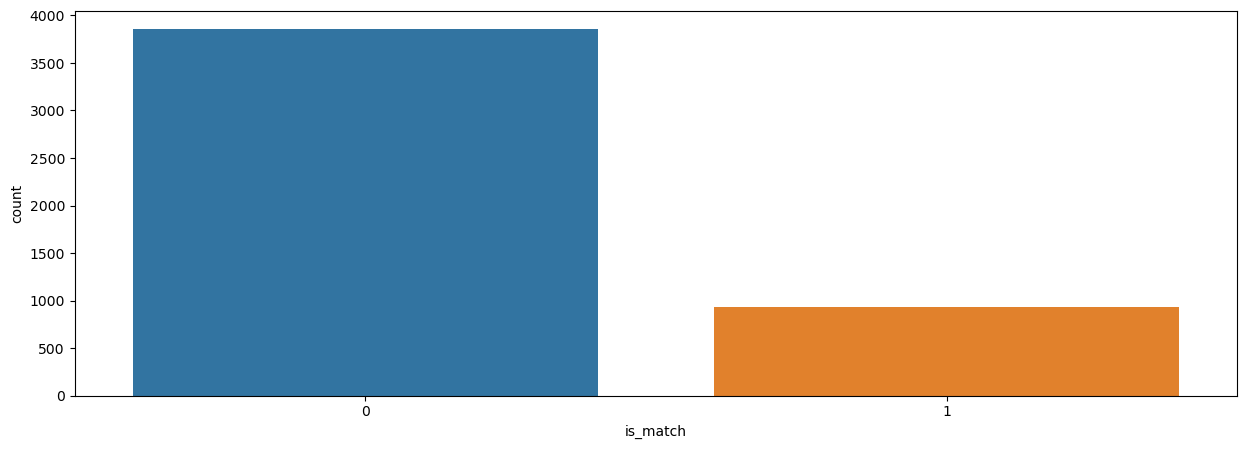

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(main_group, x="is_match")

In [14]:
#В % соотношении для группы с новым алгоритмом.
round(test_group.is_match.value_counts(normalize=True),2)

0    0.6
1    0.4
Name: is_match, dtype: float64

<Axes: xlabel='is_match', ylabel='count'>

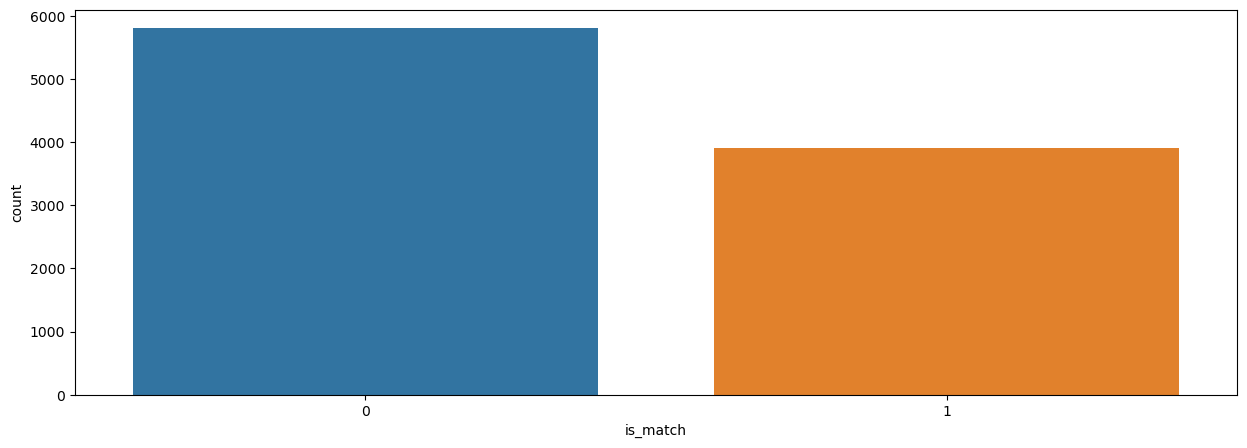

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(test_group, x="is_match")

#### Видим, что:

В группе со ***старым*** алгоритмом ***19%*** мэтчей.

В группе с ***новым*** алгоритмом ***40%*** мэтчей.


### Посмотрим на распределения обеих групп.

In [16]:
users_match_group_0 = main_group.groupby('user_id_1', as_index=False) \
                                .agg({'is_match':'count'}) \
                                .sort_values('is_match', ascending=False)

(array([  3.,  17.,  63., 103., 127., 107.,  53.,  22.,   5.,   1.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

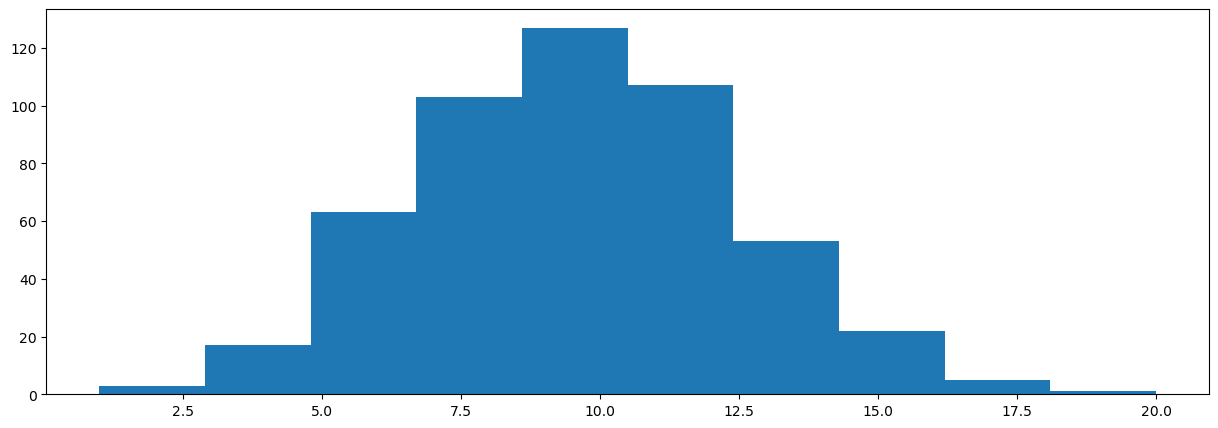

In [17]:
plt.figure(figsize=(15,5))
plt.hist(x='is_match', data = users_match_group_0)

In [18]:
users_match_group_1 = test_group.groupby('user_id_1', as_index=False) \
                                .agg({'is_match':'count'}) \
                                .sort_values('is_match', ascending=False)

(array([ 11.,  19.,  50.,  96.,  64., 133.,  83.,  37.,   3.,   3.]),
 array([11. , 12.8, 14.6, 16.4, 18.2, 20. , 21.8, 23.6, 25.4, 27.2, 29. ]),
 <BarContainer object of 10 artists>)

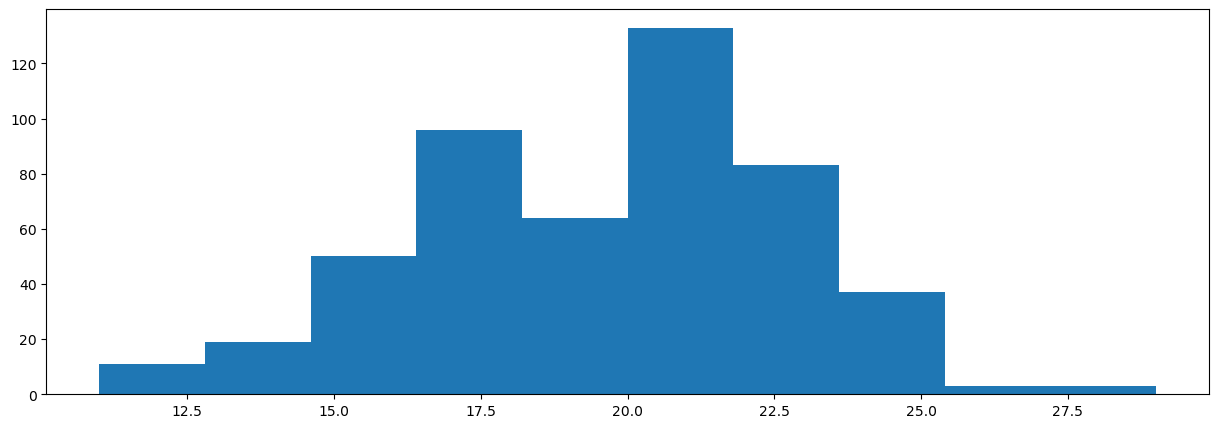

In [19]:
plt.figure(figsize=(15,5))
plt.hist(x='is_match', data = users_match_group_1)

У нас две категориальные переменные (группа и мэтч) → нужен хи-квадрат

- $H_0$: взаимосвязи между переменными нет 
- $H_1$: взаимосвязь есть

In [20]:
pd.crosstab(date_df.group, date_df.is_match)

is_match,0,1
group,,
0,3858,934
1,5813,3909


In [21]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(date_df.group, date_df.is_match))

In [22]:
stat, p

(618.6889141576198, 1.4418299163662586e-136)

In [23]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

Отклоняем H0


In [24]:
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

Отклоняем H0


### Выводы:
 
1. Мы видим увеличение количества мэтчей в группе с новым алгоритмом поиска анкет на графиках.

2. Благодаря статистическому тесту видим, что ***p-value < 0.05***. Т.е взаимосвязь между переменными есть, и новый алгоритм для поиска анкет действительно качественно повлиял на увеличение количества мэтчей пользователей.

Следовательно, включать новую систему поиска анкет на всех пользователей ***стоит***.

